In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import sys
import os
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/pyfesom2')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/SkillMetrics/')
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/cmocean-master/')
import skill_metrics as sm
import pyfesom2 as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from load_interp_GLODAP_python3 import GLODAPdata

Autosaving every 5 seconds


In [2]:
runid      =  'fesom'
resultpath = '/work/ollie/ogurses/output_f2r2/fesom2.1_recom_New_Initial_Conditions/A/'
meshpath = '/work/ollie/loziel/mesh/core2_meanz/'
# period of analysis 
first_year = 2012
last_year  = 2021
depth_limit = 50
mapproj = 'rob' # pf.get_proj('rob')
box=[-180, 180, -90, 90]

evalpath2      = '/work/ollie/ogurses/input/corrected_input/'
ncfileDSi                = evalpath2+'woa13_all_i00_01_fesom2.nc'
ncfileDIN                = evalpath2+'woa13_all_n00_01_fesom2.nc'
savepath       = !pwd

mesh       = pf.load_mesh(meshpath)
meshdiag = pf.get_meshdiag(mesh)
years = np.arange(first_year, last_year+1,1)

unit_din = 'DIN [mmol m$^{-3}$]' # equals to mumol/L
unit_dsi = 'DSi [mmol m$^{-3}$]' # equals to mumol/L

/work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2


In [3]:
from DIN_WOA_Comparison_python3 import DINcomp

DINdata = DINcomp(runid,resultpath,savepath,mesh,ncfileDIN,first_year,last_year, depth_limit = 10, 
                  plotting = False, output = True, Taylor = False)

***
Loading WOA file: /work/ollie/ogurses/input/corrected_input/woa13_all_n00_01_fesom2.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)
DIN as mean over depth 
with max layer depth = 15.0 
(level depth = 10.0m, mesh index 2)

FESOM min = 0.019119445234537125, max = 31.68463134765625
WOA min = 0.0021302439272403717, max = 33.72556400299072
Min of difference WOA-FESOM: -26.553955018520355


In [4]:
from DSi_WOA_Comparison_python3 import DSicomp

DSidata = DSicomp(runid,resultpath,savepath,mesh,ncfileDSi,first_year,last_year, depth_limit = 10, 
        plotting = False, output = True, Taylor = False)

***
Loading WOA file: /work/ollie/ogurses/input/corrected_input/woa13_all_i00_01_fesom2.nc
***
***
Depth greater in FESOM (-6125.0) than in WOA (-5500.0)


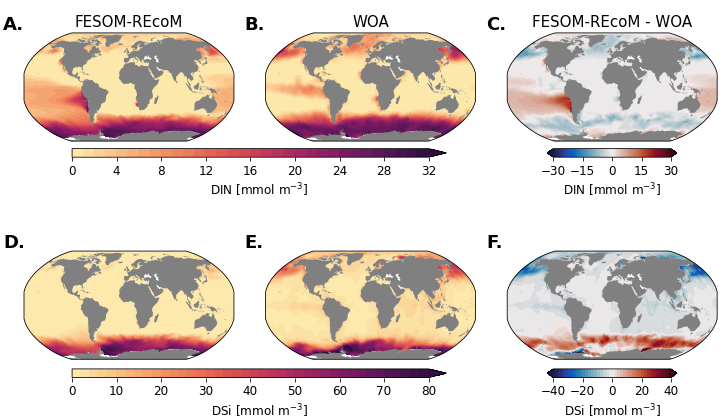

In [5]:
fig, ax = pf.create_proj_figure(mapproj, (2,3), (10,6))
#fig.tight_layout(pad=3.0)

ax = ax.flatten()

levels_din = np.arange(0,33,1)
levels_din_anom = np.arange(-30,31,1)
levels_din_anom_ticks = np.arange(-30,40,15)
levels_dsi = np.arange(0,81,2)
levels_dsi_anom = np.arange(-40,41,2)
levels_dsi_anom_ticks = np.arange(-40,50,20)

m1 = ax[0]
f1 = pf.subplot(mesh, fig, m1, [DINdata.fesom], 
                                levels = levels_din,
                                units=unit_din, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.matter,
                                cmap_extension='max',
                                titles='FESOM-REcoM',
                                title_size = 15,
                               )

m2 = ax[1]
f2 = pf.subplot(mesh, fig, m2, [DINdata.woa], 
                                levels = levels_din,
                                units=unit_din, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.matter,
                                cmap_extension='max',
                                titles='WOA',
                                title_size = 15,
                               )


cbar1_ax = fig.add_axes([0.1, 0.59, 0.52, 0.02])
cbar1 = fig.colorbar(f1,
                                    cax = cbar1_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar1.set_label(unit_din, fontsize=12)
cbar1.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m3 = ax[2]
f3 = pf.subplot(mesh, fig, m3, [DINdata.fesom - DINdata.woa], 
                                levels = levels_din_anom,
                                units=unit_din, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='FESOM-REcoM - WOA',
                                title_size = 15,
                               )

cbar3_ax = fig.add_axes([0.76, 0.59, 0.18, 0.02])
cbar3 = fig.colorbar(f3,
                                    cax = cbar3_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_din_anom_ticks) 
cbar3.set_label(unit_din, fontsize=12)
cbar3.ax.tick_params(labelsize=12)

levels = np.arange(2100,2600,100)

m4 = ax[3]
f4 = pf.subplot(mesh, fig, m4, [DSidata.fesom], 
                                levels = levels_dsi,
                                units=unit_dsi, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.matter,
                                cmap_extension='max',
                                titles='',
                                title_size = 15,
                               )

m5 = ax[4]
f5 = pf.subplot(mesh, fig, m5, [DSidata.woa], 
                                levels = levels_dsi,
                                units=unit_dsi, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.matter,
                                cmap_extension='max',
                                titles='',
                                title_size = 15,
                               )


cbar5_ax = fig.add_axes([0.1, 0.08, 0.52, 0.02])
cbar5 = fig.colorbar(f5,
                                    cax = cbar5_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04) 
cbar5.set_label(unit_dsi, fontsize=12)
cbar5.ax.tick_params(labelsize=12)


levels = np.arange(-100,120,20)

m6 = ax[5]
f6 = pf.subplot(mesh, fig, m6, [DSidata.fesom - DSidata.woa], 
                                levels = levels_dsi_anom,
                                units=unit_dsi, 
                                mapproj=mapproj, # robinson projection takes more time!
                                cmap = cmo.cm.balance,
                                cmap_extension='both',
                                titles='',
                                title_size = 15,
                               )

cbar6_ax = fig.add_axes([0.76, 0.08, 0.18, 0.02])
cbar6 = fig.colorbar(f6,
                                    cax = cbar6_ax, 
                                    orientation = 'horizontal',
                                    fraction=0.046, pad=0.04,
                                    ticks = levels_dsi_anom_ticks) 
cbar6.set_label(unit_dsi, fontsize=12)
cbar6.ax.tick_params(labelsize=12)

m1.text(-0.1, 1.03, 'A.', transform=m1.transAxes,
            size=18, weight='bold')
m2.text(-0.1, 1.03, 'B.', transform=m2.transAxes,
            size=18, weight='bold')
m3.text(-0.1, 1.03, 'C.', transform=m3.transAxes,
            size=18, weight='bold')
m4.text(-0.1, 1.03, 'D.', transform=m4.transAxes,
            size=18, weight='bold')
m5.text(-0.1, 1.03, 'E.', transform=m5.transAxes,
            size=18, weight='bold')
m6.text(-0.1, 1.03, 'F.', transform=m6.transAxes,
            size=18, weight='bold')

plt.savefig('FIG_NUT_MAPS.png', dpi = 300, bbox_inches='tight',transparent=False)
plt.savefig('FIG_NUT_MAPS.pdf', bbox_inches='tight',transparent=False)